In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('fail_results_23.csv')
df

,Text
0,안녕하세요. 우리나라의 K-서비스 수출화 방안에 대한 발표를 맡은 권입니다. 현재...
1,Q. 현재 상황은? 자기 개발을 하려고 노력을 하는 성격입니다. 그래서 저라면 처...
2,안녕하세요. 지원자 권도은입니다. 저는 A 기업이 태국 시장 진출 방안에 대해서 ...
3,학술제를 준비해야 하는 상황에서 작년에 발생한 문제를 해결하고 성공적으로 학술제를...
4,안녕하세요. 지원자 권도은입니다. 현재 A사가 시국에 진출하려는 상황으로 시국의 ...
...,...
119,현정아입니다. 학술제는 학문의 이론이나 기술 따위를 연구하여 결과를 교류하기 위해...
120,"자동차 제조사 A는 비싼 가격의 모델 1에 앞세워 비국 시장에 진출하였지만, 최근..."
121,"네, 안녕하십니까? 지원자 현정아입니다. 네, 현재 취업박람회는 일정 기간 여러 ..."
122,서비스 산업은 제조업과 달리 대외 경기 역량을 적게 받는 경향이 있습니다. 따라서...


In [3]:
# 여러 행을 하나의 행으로 합치기
merged_text = ' '.join(df['Text'])

# 새로운 데이터프레임 생성
new_df = pd.DataFrame({'Text': [merged_text]})

# 기존 데이터프레임에 새로운 데이터프레임으로 교체
df = new_df

df

,Text
0,안녕하세요. 우리나라의 K-서비스 수출화 방안에 대한 발표를 맡은 권입니다. 현재...


In [4]:
#한글만 남기기

import re

df['Text'] = df['Text'].apply(lambda x: re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '', x))

df

,Text
0,안녕하세요 우리나라의 서비스 수출화 방안에 대한 발표를 맡은 권입니다 현재 우리나...


In [5]:
# 토큰화

from konlpy.tag import Okt

okt = Okt()

# df['Text'] = df['Text'].apply(lambda x: okt.morphs(x))
df['Text'] = df['Text'].apply(lambda x: okt.nouns(x))

df

,Text
0,"[우리나라, 서비스, 수출, 방안, 대한, 발표, 권, 현재, 우리나라, 국가, 중..."


In [6]:
# 글자수 하나인 것 제거
def remove_short_words(text_list, min_length=2):
    text = ' '.join(text_list)
    words = text.split()
    filtered_words = [word for word in words if len(word) >= min_length]
    return ' '.join(filtered_words)

# 'Text' 열에 함수 적용
df['Text'] = df['Text'].apply(remove_short_words)

df

,Text
0,우리나라 서비스 수출 방안 대한 발표 현재 우리나라 국가 제조업 비중 대외 경기 침...


In [7]:
# 토큰화

from konlpy.tag import Okt

okt = Okt()

# df['Text'] = df['Text'].apply(lambda x: okt.morphs(x))
df['Text'] = df['Text'].apply(lambda x: okt.nouns(x))

df

,Text
0,"[우리나라, 서비스, 수출, 방안, 대한, 발표, 현재, 우리나라, 국가, 제조업,..."


In [8]:
stop_words = ['안녕하세요', '안녕하십니까', '따라서', '지원', '우선', '일단', '얘기', '대해', '위해', '때문', '통해', '대한', '생각', '또한', '으로', '이고', '로서', '에서', '에도', '하다', '입니다']

df['Text'] = df['Text'].apply(lambda x: [word for word in x if word not in stop_words])

df

,Text
0,"[우리나라, 서비스, 수출, 방안, 발표, 현재, 우리나라, 국가, 제조업, 비중,..."


In [9]:
from collections import Counter
import operator

df['Lemma_Frequencies'] = df['Text'].apply(lambda lemmas_list: Counter(lemmas_list))

# Counter 객체의 합계를 계산하고 'Total_Frequency' 열에 저장
df['Total_Frequency'] = df['Lemma_Frequencies'].apply(lambda x: sum(x.values()))

# 'Lemma_Frequencies' 열의 Counter 객체를 빈도수를 기준으로 내림차순으로 정렬
df['Sorted_Lemma_Frequencies'] = df['Lemma_Frequencies'].apply(lambda x: dict(sorted(x.items(), key=operator.itemgetter(1), reverse=True)))

# 'Total_Frequency' 열을 기준으로 내림차순으로 정렬
df = df.sort_values(by='Total_Frequency', ascending=False)

# 필요에 따라 열 삭제
df = df.drop(['Lemma_Frequencies', 'Total_Frequency'], axis=1)

df = df.sort_index()

df

,Text,Sorted_Lemma_Frequencies
0,"[우리나라, 서비스, 수출, 방안, 발표, 현재, 우리나라, 국가, 제조업, 비중,...","{'기업': 673, '수출': 437, '지금': 357, '상황': 350, '..."


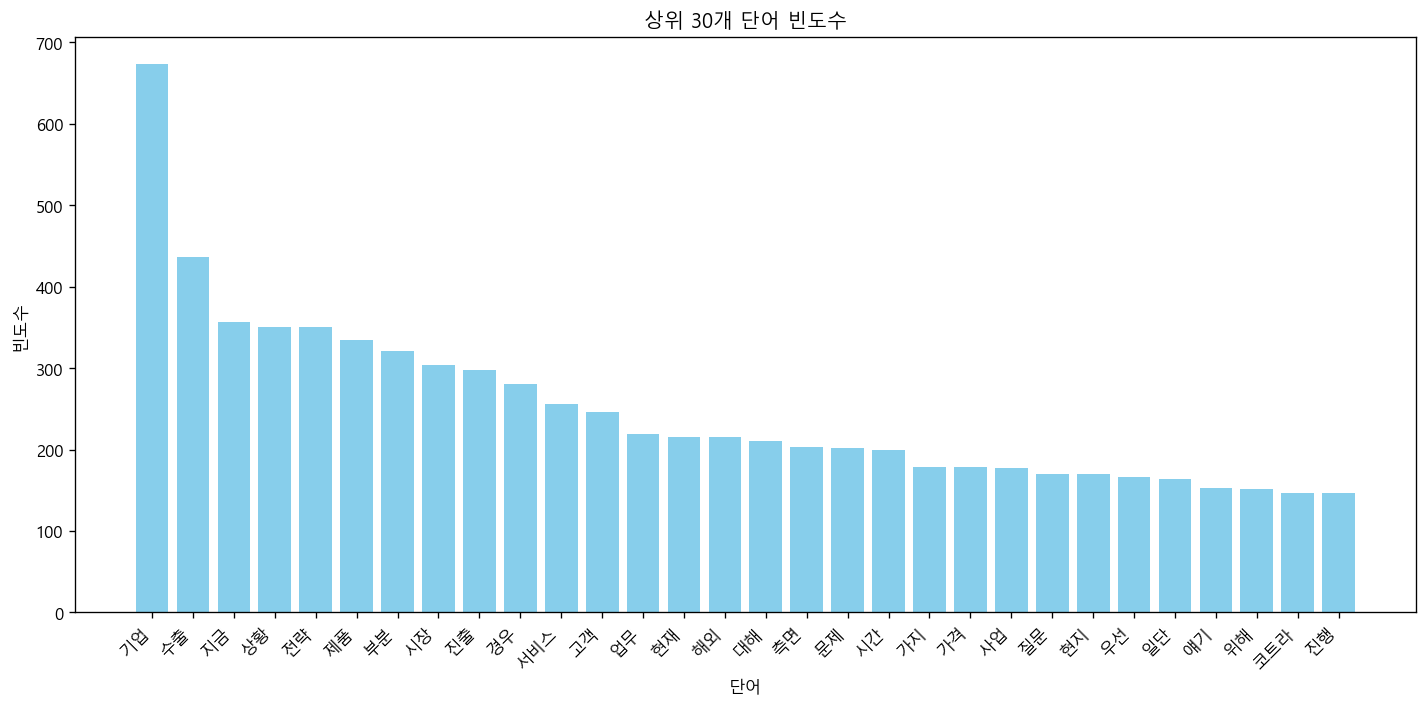

In [11]:
import matplotlib.pyplot as plt
from collections import Counter

plt.rcParams.update({'font.family'    : 'Malgun Gothic',  # 한글 폰트 설정
                     'figure.dpi'     : '120',            # 해상도 설정
                     'figure.figsize' : [6.5, 6]})        # 가로 세로 크기 설정

# 빈도수가 높은 상위 30개의 단어 추출
top_words = list(df['Sorted_Lemma_Frequencies'][0].keys())[:30]
word_counts = list(df['Sorted_Lemma_Frequencies'][0].values())[:30]

# 막대 그래프 생성
plt.figure(figsize=(12, 6))
plt.bar(top_words, word_counts, color='skyblue')
plt.xlabel('단어')
plt.ylabel('빈도수')
plt.title('상위 30개 단어 빈도수')
plt.xticks(rotation=45, ha='right')  # x 축 라벨을 45도 기울여 표시
plt.tight_layout()  # 레이아웃 조정
plt.show()